# Explore the Space

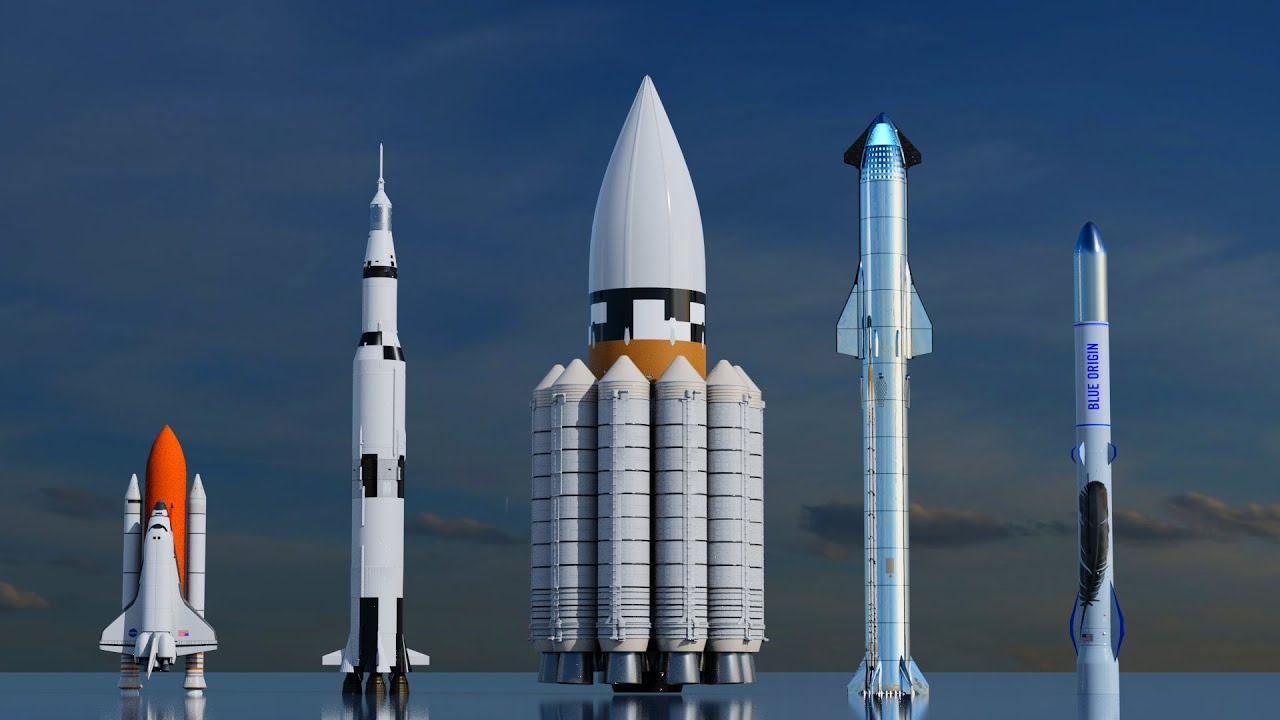

pic credit - google images

# What we will cover in this DATASET

* Basic Information of dataset

* Data pre-processing

* In Data Visualisation
  1. Maximum numbers of Rocket Mission year by year
  2. Top 15 Coutries Mission Status
  3. Top 15 Space Organisations Mission Status
  4. Total Budget year by year
  5. Total number of Launches in every years
  6. Which Space Organisation have highest number of Rocket Missions
  7. Countries and their Rocket Launch Pad
  8. Countries and their Space Organisations
  9. USA VS Russia 
  10. Plotting Countries location on Global Map

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import datetime as dt
import re
from iso3166 import countries

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("../input/all-space-missions-from-1957/Space_Corrected.csv")
data.drop(['Unnamed: 0','Unnamed: 0.1'],1,inplace = True)
data.shape

# Basic Information

In [ ]:
data.head(10)

In [ ]:
data.info()

In [ ]:
data.describe().transpose()

# Data pre-processing

> Rocket Feature is Cost of Rocket in $Million

> so we will convert Object to Float Data type and also rename as Rocket

In [ ]:
data.rename(columns={' Rocket':'Rocket','Datum':'Date'},inplace=True)

data['Rocket'] = data['Rocket'].apply(lambda x: x if(type(x)==float or (type(x)==int)) else float(x.replace(',','')) if(',' in x) else float(x) )
print('NaN Value in Rocket Column = {0:.2f}'.format(data['Rocket'].isna().sum()/len(data)*100))

> so we hava more than 50% values are Nan in Rocket Column 

> There are multiple Imputing method to fill NaN value like

> Mean , Median , Mode , KNN Imputer , Predictive Imputer and etc

> But we have only ~22% of data in Column 

> So Imputing value will be not a good idea

**Converting Date Column data type from Object to pandas Datetime**

**ans also making new column/seperate columns for Time, Days and Date**

In [ ]:
data['Date'] = pd.to_datetime(data['Date'],utc = True)
data['Time'] = data['Date'].dt.time
data['Days'] = data['Date'].dt.day_name()
data['Date'] = data['Date'].dt.date

**Extracting Country in Seprate Columns for better Understanding**

In [ ]:
data['Region'] = data['Location'].apply(lambda x:','.join(x.split(',')[-2:]).strip())
data['Country'] = data['Location'].apply(lambda x:''.join(x.split(',')[-1]).strip())
data['States'] = data['Location'].apply(lambda x:''.join(x.split(',')[-2]).strip())

# Data Visualization

# Maximum numbers of Rocket Mission year by year

**Top ten companies/organisation which have maxium numbers of rocket mission**

In [ ]:
data['Company Name'].value_counts()

fig = px.pie(data,values = data['Company Name'].value_counts().values[:10],
             names = data['Company Name'].value_counts().index[:10]
             ,hole=.4,height = 700
            )

fig.update_traces(textinfo='label+percent',textposition='inside')

fig.update_layout(title='Top 10 Companies',
                 annotations=[dict(x=0.5,y=0.5,text='Companies',showarrow=False,font_size=20)])

fig.show()

**Top 10 Countries with Maximum Mission**

In [ ]:
data['Country'].value_counts().index[:10]

fig = px.pie(data,values=data['Country'].value_counts().values[:10],
                 names = data['Country'].value_counts().index[:10],
                 title='Top 10 Countries with Maximum Mission',
                 hole=.4,height = 700
                )

fig.update_traces(textposition='inside',textinfo='label+percent')

fig.update_layout(annotations=[dict(x=.5,y=.5,text='Countries',showarrow=False,font_size=20)])

fig.show()

In [ ]:
def findTopTen(col1,col2,val):
    
    final = {'Success':0,'Failure':0, 'Partial Failure':0, 'Prelaunch Failure':0,col1:''}
    finalDF = pd.DataFrame(final,index=[0])
    n = val[col1].value_counts().index[:15].values
    
    for i in n:
        m = val[val[col1]==i][col2]
        unique = m.value_counts()
        for key,values in zip(unique.index.values,unique.values):
            final[key] = values
        final[col1] = i
        finalDF = finalDF.append(final,ignore_index=True)
        
    return finalDF

# Top 15 Coutries Mission Status

In [ ]:

topcountry = findTopTen('Country','Status Mission',data)
fig = px.bar(topcountry,x='Country',y=['Success','Failure','Partial Failure','Prelaunch Failure'],
             title='Top 15 Countries Mission Status',height = 700)

fig.show()

# Top 15 Space Organisations Mission Status

In [ ]:
topCompany = findTopTen('Company Name','Status Mission',data)

fig = px.bar(topCompany,x='Company Name',y=['Success','Failure','Partial Failure','Prelaunch Failure'],
            title = 'Top 15 Space Organisations Mission Status',height = 700)

fig.show()

# Total Budget year by year

In [ ]:
data['Rocket']  = data['Rocket'].values*1000000

budget = data[['Date','Rocket']]
budget['Date'] = pd.to_datetime(budget['Date'])
budget.set_index('Date',inplace = True)

Yearlybudget = budget.resample('Y').sum().ffill()
monthlyBudget = budget.resample('M').sum().ffill()

In [ ]:
fig  = px.line(Yearlybudget,x=Yearlybudget.index,y='Rocket',title='Total Budget year by year',height = 600)

fig.update_traces(hoverinfo='text+name', mode='lines+markers')

fig.show()

# Total number of Launches in every years

In [ ]:
launch = data['Date'].value_counts()
launch = pd.DataFrame(launch.values,columns=['Count'],index=launch.index)
launch.index = pd.to_datetime(launch.index)
yearLaunch = launch.resample('Y').sum()


#launch
fig = px.bar(yearLaunch , x=yearLaunch.index,y='Count',title='Total Number of Rocket Launch year by year',height = 600,
            color='Count')
fig.show()

# Which Space Organisation have highest number of Rocket Missions

In [ ]:
org = data['Company Name'].value_counts()
org = pd.DataFrame(org.values,columns = ['Count'],index = org.index)

fig = px.bar(org,x = org.index, y = 'Count',title = 'Organisation with Highest Rocket Missions over Years',color='Count',
            height = 650)
fig.show()

# Contries and their Rocket Launch Pad

In [ ]:
fig = px.sunburst(data,path = ['Country','States'],height = 700,title = 'Contries and their Rocket Launch Pad')

fig.show()

# Country and their Space Organisations

In [ ]:
fig = px.sunburst(data, path = ['Country','Company Name'], title = 'Country and their Space Organisations',height = 700)

fig.show()

# Total Mission and Status of Russia and USA

In [ ]:
newDf = data[data['Country'].isin(['USA','Russian Federation'])]

fig = px.bar(newDf , x='Country', facet_col = "Status Mission",color = 'Country'
             ,color_continuous_scale=px.colors.sequential.Cividis_r, title = 'USA and Russia and their Mission Status'
            )
fig.show()


# Total Money Spend by USA and Russia year by year

In [ ]:
fig = px.histogram(newDf , x = 'Date',y='Rocket',color = 'Country',title = 'Total Money Spend by USA and Russia year by year')

fig.show()

# Mission Cost and Status of USA and Russia year by year

In [ ]:
fig = px.histogram(newDf , x = 'Date',y='Rocket',color = 'Status Mission'
                   ,title = 'Mission Cost and Status of USA and Russia year by year',
                  height = 650)

fig.show()

# Plotting Countries location on Global Map

In [ ]:
data.loc[data['Country'] == 'Russia', 'Country'] = 'Russian Federation'
data.loc[data['Country'] == 'New Mexico', 'Country'] = 'USA'
data.loc[data['Country'] == "Yellow Sea", 'Country'] = "China"
data.loc[data['Country'] == "Shahrud Missile Test Site", 'Country'] = "Iran"
data.loc[data['Country'] == "Pacific Missile Range Facility", 'Country'] = "USA"
data.loc[data['Country'] == "Barents Sea", 'Country'] = 'Russian Federation'
data.loc[data['Country'] == "Gran Canaria", 'Country'] = 'USA'

allCountries = {}

for c in countries:
    allCountries[c.name] = c.alpha3

allCountries

data['AlphaNames'] = data['Country']

data = data.replace({'AlphaNames':allCountries})

data.loc[data['Country'] == "North Korea", 'AlphaNames'] = "PRK"
data.loc[data['Country'] == "South Korea", 'AlphaNames'] = "KOR"

# Countries on Global Map

In [ ]:
mapdf = data.groupby(['Country', 'AlphaNames'])['Status Mission'].count().reset_index()
fig = px.choropleth(mapdf,locations = 'AlphaNames',color='Country',projection="equirectangular",height = 600,width = 1200)
fig.show()

# Year by year Mission took place and Mission Status

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.sort_values('Date',inplace = True)
data['Year'] = data['Date'].dt.year

fig = px.choropleth(data,locations = 'AlphaNames',animation_frame = 'Year',color = 'Status Mission',title = 'Countries Rocket Mission Status year by year',
                   height = 650)
fig.show()

* If you guys find this usefull then please upvote
* If you guys have any suggestion or find any mistake then please comment down, I will try to improvise.

**Thank You**